# Anisotropic diffusion operator for the VDF discretization in TRUST

In [1]:
from trustutils import run

run.introduction("Elie Saikali and Thomas Galie.","27/05/2021")

## Introduction 
 Validation made by : Elie Saikali and Thomas Galie.



 Report created : 27/05/2021



 Report generated 26/01/2022

### Description

This document presents a validation regarding the implementation of the anisotropic diffusion operator in the TRUST platform. Only the VDF discretisation is considered in the present work. Different simulations are performed and numerical results at steady-state are compared to analytical solutions for validations. Two test cases are investigated in this work. The first one is to validate a 2D heat conduction problem with an anisotropic discontinuous conductivity tensor, while the second with an anisotropic non-uniform conductivity tensor. For the second test case, the sensitivity of the mesh and the influence of the anisotropy ratio is also reported. The reader is kindly invited to check PH. Mairea and J. Breil for a detailed discussion concerning the studied test cases, (https://hal.archives-ouvertes.fr/hal-00605548/document).

The 2D heat conduction equation is expressed as
\begin{equation}\label{cond}
\rho c_p \frac{\partial T}{\partial t} - \nabla\cdot (\kappa\nabla T)=\dot{q_v}.
\end{equation}
$\rho$ [kg.m$^{-3}$] denotes the density field, $c_p$ [J.kg$^{-1}$.K$^{-1}$] the specific heat capacity, $\kappa$ [W.K$^{-1}$.m$^{-1}$] the heat conductivity tensor and $\dot{q_v}$ [W.m$^{-3}$] the volumetric heat source term. The domain considerd is $\Omega=[0,1]^2 \in \mathbb{R}^2$. Both $\rho$ and $c_p$ fields are assumed constant and uniform; their values are set to unity. 

Regarding the source term $\dot{q_v}$ and the conductivity tensor, the employed formulations are dependant of the treated test case and will be discussed later in each section. The SYMPY library from python3 is used to define the exact source term based on the known analytical solution (see the validation file diffusion anisotrope VEF for further information). 


In [2]:
run.TRUST_parameters("1.8.3")

### TRUST parameters 
 * Version TRUST: 1.8.3
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/Verification_codage/diffusion_anisotrope_VDF/build)

In [3]:
from trustutils import run 
c1 = run.addCase("TC1","TC1.data"    ,nbProcs=1)
c2 = run.addCase("TC2/Ar1/M1","TC2.data"    ,nbProcs=1)
c3 = run.addCase("TC2/Ar1/M2","TC2.data"    ,nbProcs=2)
c4 = run.addCase("TC2/Ar1/M3","TC2.data"    ,nbProcs=4)
c5 = run.addCase("TC2/Ar1/M1","TC2_iso.data",nbProcs=1) 
c1 = run.addCase("TC2/Ar1/M2","TC2_iso.data",nbProcs=2)
c2 = run.addCase("TC2/Ar1/M3","TC2_iso.data",nbProcs=4)
c3 = run.addCase("TC2/Ar10/M1","TC2.data"    ,nbProcs=1)
c4 = run.addCase("TC2/Ar10/M2","TC2.data"    ,nbProcs=2)
c5 = run.addCase("TC2/Ar10/M3","TC2.data"    ,nbProcs=4) 
c1 = run.addCase("TC2/Ar100/M1","TC2.data"    ,nbProcs=1)
c2 = run.addCase("TC2/Ar100/M2","TC2.data"    ,nbProcs=2)
c3 = run.addCase("TC2/Ar100/M3","TC2.data"    ,nbProcs=4) 
c1 = run.addCase("TC2/Ar1000/M1","TC2.data"    ,nbProcs=1)
c2 = run.addCase("TC2/Ar1000/M2","TC2.data"    ,nbProcs=2)
c3 = run.addCase("TC2/Ar1000/M3","TC2.data"    ,nbProcs=4) 
run.printCases()

### Test cases 
* TC1/TC1.data : 
* TC2/Ar1/M1/TC2.data : 
* TC2/Ar1/M2/TC2.data : 
* TC2/Ar1/M3/TC2.data : 
* TC2/Ar1/M1/TC2_iso.data : 
* TC2/Ar1/M2/TC2_iso.data : 
* TC2/Ar1/M3/TC2_iso.data : 
* TC2/Ar10/M1/TC2.data : 
* TC2/Ar10/M2/TC2.data : 
* TC2/Ar10/M3/TC2.data : 
* TC2/Ar100/M1/TC2.data : 
* TC2/Ar100/M2/TC2.data : 
* TC2/Ar100/M3/TC2.data : 
* TC2/Ar1000/M1/TC2.data : 
* TC2/Ar1000/M2/TC2.data : 
* TC2/Ar1000/M3/TC2.data : 


In [4]:
run.runCases()

Running **with Sserver**...
  => A total of 16 cases were (successfully) run in 37.4s.


## Test case 1 :  anisotropic and discontinuous $\kappa$

For this test case, the source term is set to zero; $\dot{q_v}=0$. The heat conductivity tensor is anisotropic and discontinuous, defined $\forall (x,y)\in \Omega$ as 

\begin{equation}\label{tensor_c1}
\kappa(x,y)=
\left\{
\begin{aligned}
&\displaystyle\left(\begin{matrix} 1 & 0 \\ 0 & 4 \end{matrix}\right) \quad : \quad x\in[0,0.5], \\
&\displaystyle\left(\begin{matrix} 10 & 0 \\ 0 & 2 \end{matrix}    \right) \quad : \quad x\in[0.5,1].
\end{aligned}
\right.
\end{equation}

For such a $\kappa$ distribution, the analytical solution $T_{exact}$ is one-dimensional. With the Dirichlet boundary conditions defined as $T_{exact}(x=0)=0$ and $T_{exact}(x=1)=1$, the solution reads as
\begin{equation}
\label{sol_c1}
T_{exact}(x)=\left\{
\begin{aligned}
&\displaystyle \frac{20 x}{11} \quad &: \quad x\in[0,0.5], \\
&\displaystyle\frac{9}{11} + \frac{2x}{11}\quad &: \quad x\in[0.5,1].
\end{aligned}
\right.
\end{equation}

The mesh uniform formed of 51 $\times$ 51 squares. The boundary conditions at the left and at the right walls are set to $T=0$ and 1 K respectively. At the top and the bottom boundaries, a Dirichlet condition is prescribed satisfying the equation \eqref{sol_c1}.

The components of the conductivity tensor are illustrated in figures 2.2-2.4 where the discontinuity of the fields is clearly noted. Figure 2.5 depicts the temperature distribution at the steady state (physical time about 0.75 s). The error relative to the exact solution is considered in figure 2.6. It is clear how the difference between the numerical and exact solution is very small. 

### Mesh


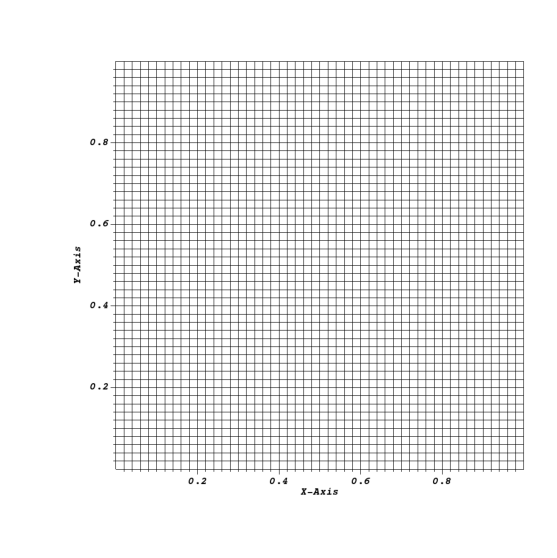

In [5]:
from trustutils import visit

a = visit.Show("TC1/TC1.lata", 'Mesh',"DOM")
a.visuOptions(['no_databaseinfo','no_legend'])
a.plot()

### Conductivity tensor : component 1

### Mesh

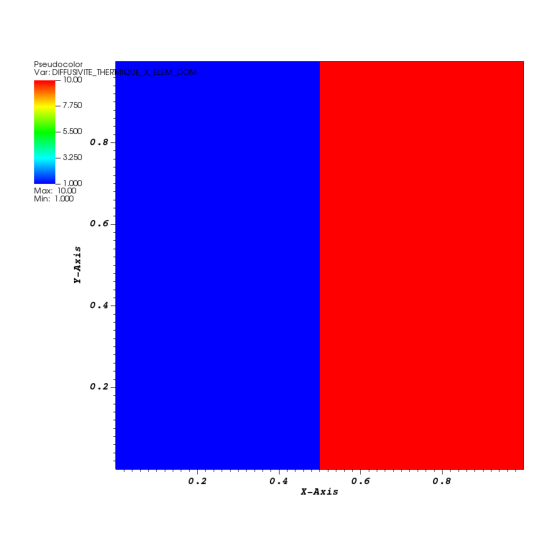

In [6]:
a = visit.Show("TC1/TC1_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_X_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Conductivity tensor : component 2

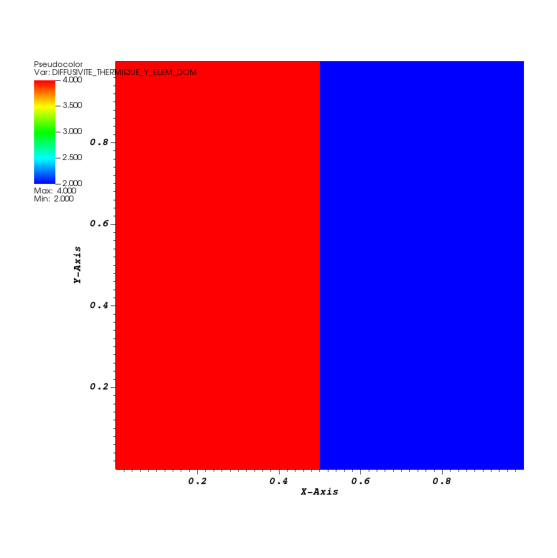

In [7]:
a = visit.Show("TC1/TC1_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_Y_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Temperature at steady state

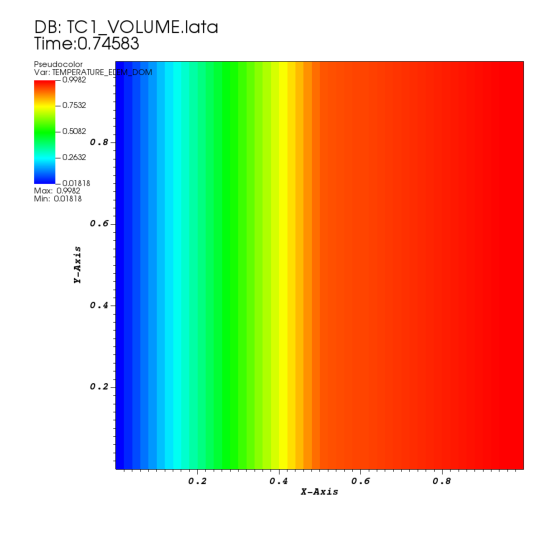

In [8]:
visit.showField("TC1/TC1_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution

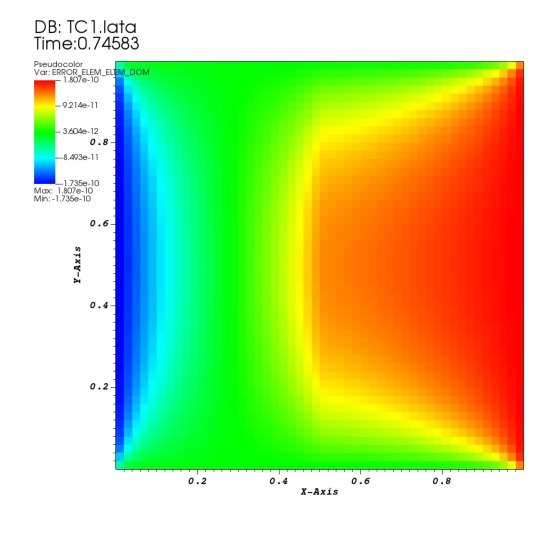

In [9]:
visit.showField("TC1/TC1.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

## Test case 2 :  anisotropic and non-uniform $\kappa$

The conductivity tensor for this case is anisotropic and non-uniform in $\Omega$, expressed as
\begin{equation}\label{tensor_c2}
\kappa(x,y)=\left(\begin{matrix} \eta x^2 +y^2 & -(1-\eta)xy \\ -(1-\eta)xy & x^2 + \eta y^2 \end{matrix}\right). 
\end{equation}
Here $\eta$ is a positive parameter characterizing the level of anisotropy. We note the anisotropy ratio as
\begin{equation}
A_r=\frac{1}{\eta}.
\end{equation}

Moreover, a thermal source term $\dot{q_v}$ is applied to the system in this test case. Its formulation is defined so that the analytical solution of the problem is 

\begin{equation}\label{sol_c2}
T_{exact}(x,y)=\sin^2(\pi x)\sin^2(\pi y).
\end{equation}

On the boundaries $\partial \Omega$, a Dirichlet boundary condition $T(x,y,t)=0$ is prescribed. 

In order to highlight the inflence of the anisotropy, four values of $A_r$ are investigated; respectively 1, 10, 100 and 1000. This leads not only to different values in the components of the $\kappa$ tensor, but also to different source term that verifies the exact solution \eqref{sol_c2}. In this work, we use the SYMPY library to derive the expression of $\dot{q_v}$ depending on the considered $A_r$. Recall that SYMPY is a library provided with python3 and TRUST. It allows manipulating mathematical operartions with symbolic variables; here the term $-\nabla.(\kappa \nabla T=\dot{q_v}$ (at steady state). See the document *useful\_scripts.pdf* for further information on evaluating the expression of $\dot{q_v}$.

We denote by $\dot{q_v}^1$ the source term corresponding to $A_r=1$ ($\eta=1$). Similarly, $\dot{q_v}^{10}$ is referred to for the case of $A_r=10$ ($\eta=0.1$), $\dot{q_v}^{100}$ for $A_r=100$ ($\eta=0.01$) and $\dot{q_v}^{1000}$ for $A_r=1000$ ($\eta=0.001$). Following these notations, the imposed source terms are respectively expressed as

\begin{multline}
\dot{q_v}^1=- 4.0 \pi x \sin{\left(\pi x \right)} \sin^{2}{\left(\pi y \right)} \cos{\left(\pi x \right)}     - 4.0 \pi y \sin^{2}{\left(\pi x \right)} \sin{\left(\pi y \right)} \cos{\left(\pi y \right)} +\\ 2     \pi^{2} \left(x^{2} + 1.0 y^{2}\right) \sin^{2}{\left(\pi x \right)} \sin^{2}{\left(\pi y \right    )} - 2 \pi^{2} \left(x^{2} + 1.0 y^{2}\right) \sin^{2}{\left(\pi x \right)} \cos^{2}{\left(\pi y     \right)} +\\ 2 \pi^{2} \left(1.0 x^{2} + y^{2}\right) \sin^{2}{\left(\pi x \right)} \sin^{2}{\left(    \pi y \right)} - 2 \pi^{2} \left(1.0 x^{2} + y^{2}\right) \sin^{2}{\left(\pi y \right)} \cos^{2}{    \left(\pi x \right)} 
\end{multline}

\begin{multline}
\dot{q_v}^{10}=7.2 \pi^{2} x y \sin{\left(\pi x \right)} \sin{\left(\pi y \right)} \cos{\left(\pi x \right)} \cos{\left(\pi y \right)} + 1.4 \pi x \sin{\left(\pi x \right)} \sin^{2}{\left(\pi y \right)} \cos{\left(\pi x \right)} +\\ 1.4 \pi y \sin^{2}{\left(\pi x \right)} \sin{\left(\pi y \right)} \cos{\left(\pi y \right)} + 2 \pi^{2} \left(0.1 x^{2} + y^{2}\right) \sin^{2}{\left(\pi x \right)} \sin^{2}{\left(\pi y \right)} -\\ 2 \pi^{2} \left(0.1 x^{2} + y^{2}\right) \sin^{2}{\left(\pi y \right)} \cos^{2}{\left(\pi x \right)} + 2 \pi^{2} \left(x^{2} + 0.1 y^{2}\right) \sin^{2}{\left(\pi x \right)} \sin^{2}{\left(\pi y \right)} -\\ 2 \pi^{2} \left(x^{2} + 0.1 y^{2}\right) \sin^{2}{\left(\pi x \right)} \cos^{2}{\left(\pi y \right)} \quad \quad \quad \quad
\end{multline}

\begin{multline}
\dot{q_v}^{100}=7.92 \pi^{2} x y \sin{\left(\pi x \right)} \sin{\left(\pi y \right)} \cos{\left(\pi x \right)} \cos{\left(\pi y \right)} + 1.94 \pi x \sin{\left(\pi x \right)} \sin^{2}{\left(\pi y \right)} \cos{\left(\pi x \right)} +\\ 1.94 \pi y \sin^{2}{\left(\pi x \right)} \sin{\left(\pi y \right)} \cos{\left(\pi y \right)} + 2 \pi^{2} \left(0.01 x^{2} + y^{2}\right) \sin^{2}{\left(\pi x \right)} \sin^{2}{\left(\pi y \right)} -\\ 2 \pi^{2} \left(0.01 x^{2} + y^{2}\right) \sin^{2}{\left(\pi y \right)} \cos^{2}{\left(\pi x \right)} + 2 \pi^{2} \left(x^{2} + 0.01 y^{2}\right) \sin^{2}{\left(\pi x \right)} \sin^{2}{\left(\pi y \right)} -\\ 2 \pi^{2} \left(x^{2} + 0.01 y^{2}\right) \sin^{2}{\left(\pi x \right)} \cos^{2}{\left(\pi y \right)} \quad \quad \quad \quad
\end{multline}

\begin{multline}
\dot{q_v}^{1000}=7.992 \pi^{2} x y \sin{\left(\pi x \right)} \sin{\left(\pi y \right)} \cos{\left(\pi x \right)} \cos{\left(\pi y \right)} + 1.994 \pi x \sin{\left(\pi x \right)} \sin^{2}{\left(\pi y \right)} \cos{\left(\pi x \right)} +\\ 1.994 \pi y \sin^{2}{\left(\pi x \right)} \sin{\left(\pi y \right)} \cos{\left(\pi y \right)} + 2 \pi^{2} \left(0.001 x^{2} + y^{2}\right) \sin^{2}{\left(\pi x \right)} \sin^{2}{\left(\pi y \right)} -\\ 2 \pi^{2} \left(0.001 x^{2} + y^{2}\right) \sin^{2}{\left(\pi y \right)} \cos^{2}{\left(\pi x \right)} + 2 \pi^{2} \left(x^{2} + 0.001 y^{2}\right) \sin^{2}{\left(\pi x \right)} \sin^{2}{\left(\pi y \right)} -\\ 2 \pi^{2} \left(x^{2} + 0.001 y^{2}\right) \sin^{2}{\left(\pi x \right)} \cos^{2}{\left(\pi y \right)} \quad \quad \quad \quad
\end{multline}

Finally, to correctly investigate the influence of the anisotropy ratio on the quality of the numerical solution, three meshes are considered for this test case. They are respectively referred to by M1, M2 and M3. M1 is the coarsest one and consists of 4802 triangles (edge length between 0.02-0.04). M2 is here an intermediate resolution mesh and consists of 15842 triangles computed over 2 MPI procs are used for this computational domain (edge length between 0.01-0.03). The finest one is M3 with 64082 triangles computed over 4 MPI procs are used for this computational domain (edge length between 0.005-0.007). We imphasize here that the idea is **not to perform a mesh convergence analysis**, but analyze the influence of the mesh by showing how a fine resolution is required when $A_r$ becomes important. Figures 3.1-3.3 depict the three meshes used for this test case. Numerical results, at steady state, are discussed and compared to the analytical solution \eqref{sol_c2} in sections 4 to 7.




### The Mesh M1

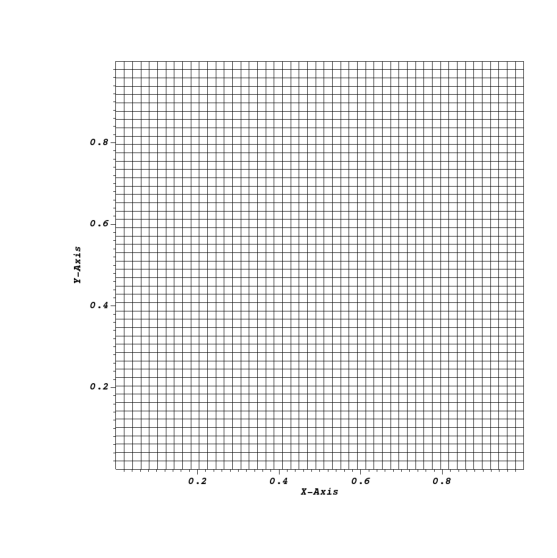

In [10]:
a = visit.Show("TC2/Ar100/M1/TC2.lata", "Mesh", "DOM")
a.visuOptions(['no_databaseinfo','no_legend'])
a.plot()

### The Mesh M2

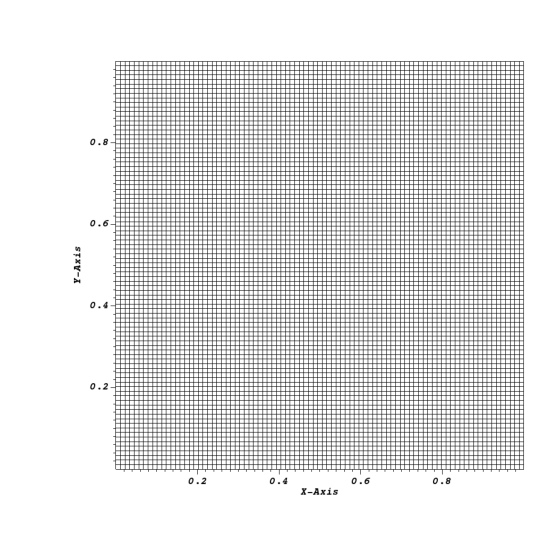

In [11]:
a = visit.Show("TC2/Ar100/M2/TC2.lata", 'Mesh',"DOM")
a.visuOptions(['no_databaseinfo','no_legend'])
a.plot()

### The Mesh M3

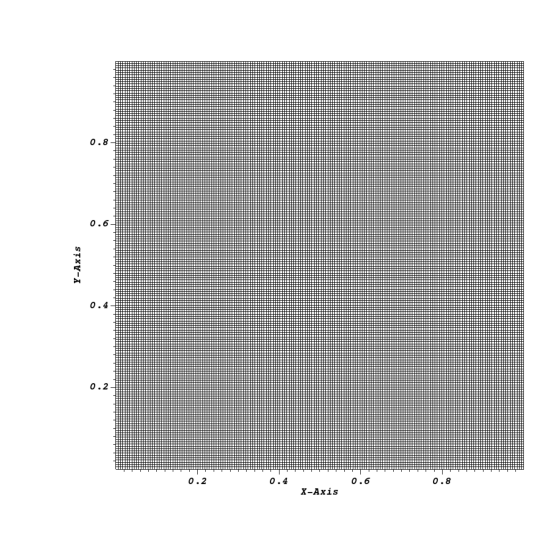

In [12]:
a = visit.Show("TC2/Ar100/M3/TC2.lata","Mesh","DOM")
a.visuOptions(['no_databaseinfo','no_legend'])
a.plot()

## Results of test case 2 with $Ar= 1$

The conductivity components are identical for this case (see distribution in figure 4.1). We note that the conductivity is diagonally distributed in the domain; highest values at the top right corner, and diffuses symmetrically to the facing corner where it takes the smallest value. The obtained temperature distribution at steady state with mesh M1 (physical time about 12.5 s) is shown in figure 4.2 and the difference from the analytical solution is illustrated in figure 4.3. It can be stated that the solution is not far from the exact solution, although the error values are not too small compared to test case 1; here the difference can reach to about $9.10^{−4}$ K. With M2, the resolution is improved and the time required to reach a steady state is reduced (10.3 s of physical time). This can be illustrated in figures 4.4 and 4.5. Moreover, better improvements are recorded with M3: steady state reaches at 7.2 s, and absolute error about $7.6\cdot10^{−5}$ K at maximum (see figures 4.6 and 4.7). Same results are obtained on all meshes with an isotropic conductivity which confirms the results (figures 4.8 to 4.13).


### Conductivity tensor : component 1

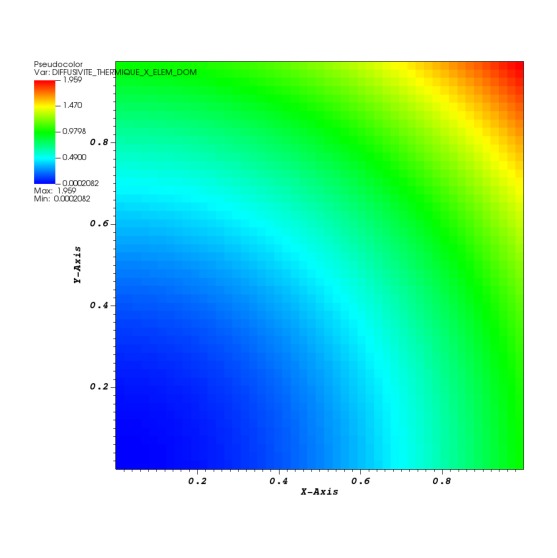

In [13]:
a = visit.Show("TC2/Ar1/M1/TC2_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_X_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Temperature at steady state : M1

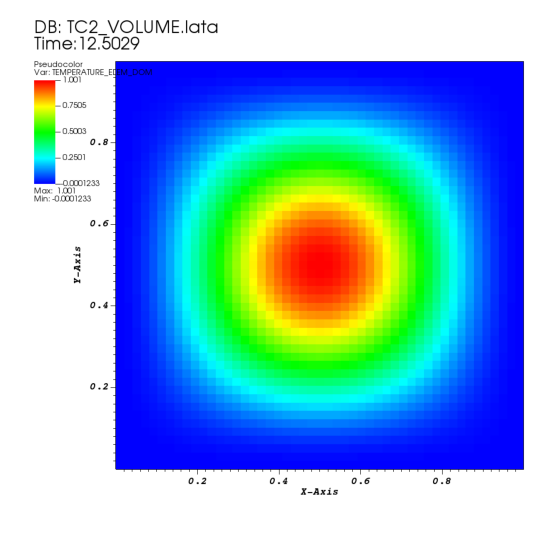

In [14]:
a = visit.Show("TC2/Ar1/M1/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)
a.plot()

### Difference from analytical solution: M1

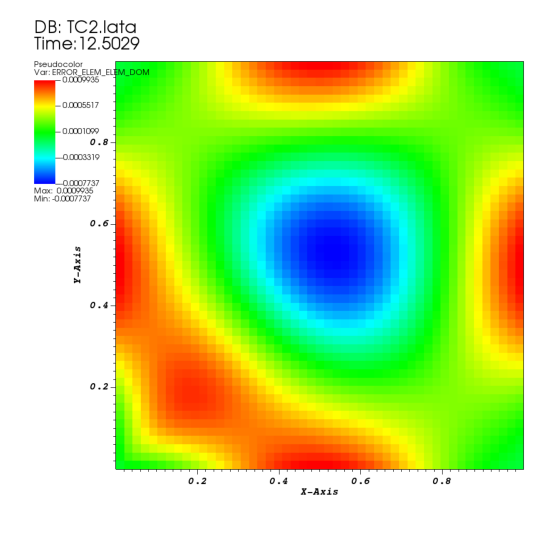

In [15]:
visit.showField("TC2/Ar1/M1/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state : M2

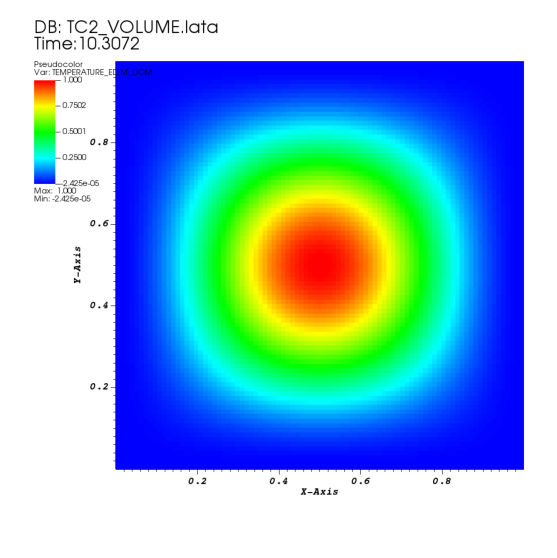

In [16]:
visit.showField("TC2/Ar1/M2/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution: M2

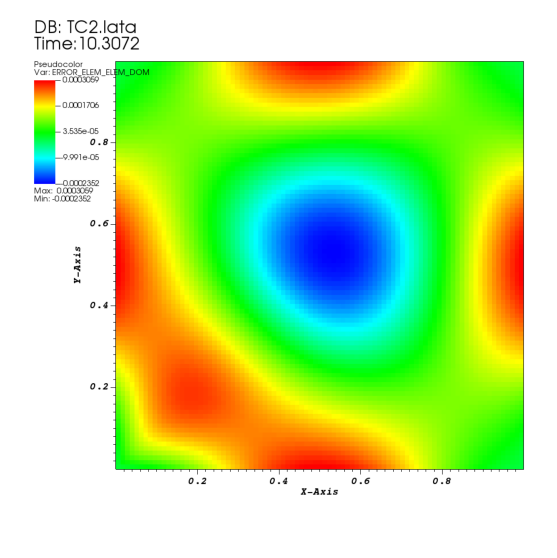

In [17]:
visit.showField("TC2/Ar1/M2/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state : M3

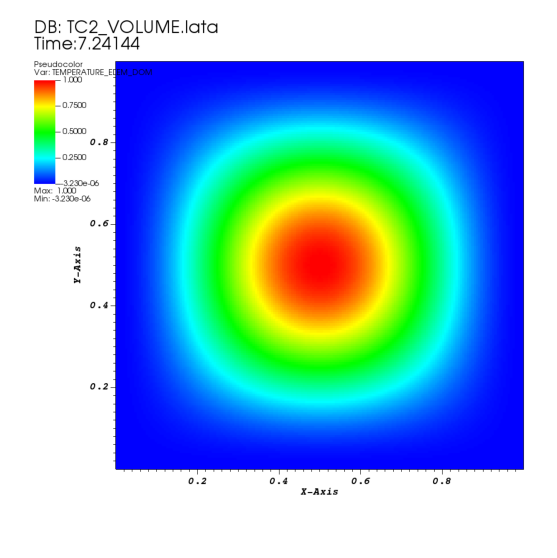

In [18]:
visit.showField("TC2/Ar1/M3/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (absolute value) : M3

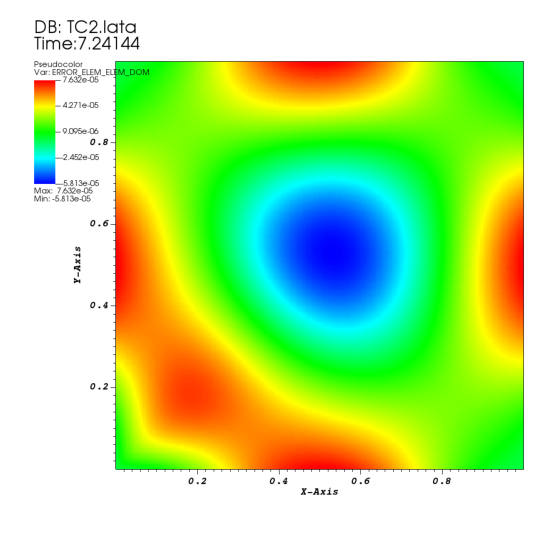

In [19]:
visit.showField("TC2/Ar1/M3/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state (Isotropic conductivity) : M1

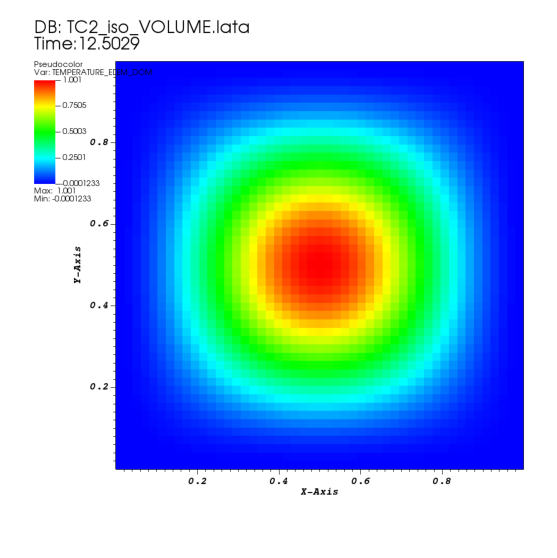

In [20]:
visit.showField("TC2/Ar1/M1/TC2_iso_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (Isotropic) : M1

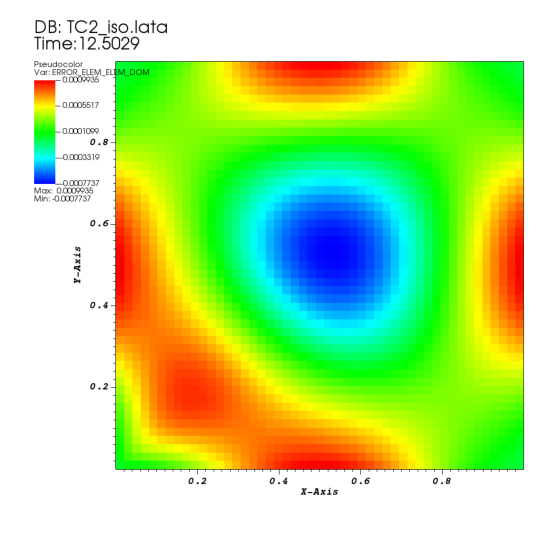

In [21]:
visit.showField("TC2/Ar1/M1/TC2_iso.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state (Isotropic conductivity) : M2

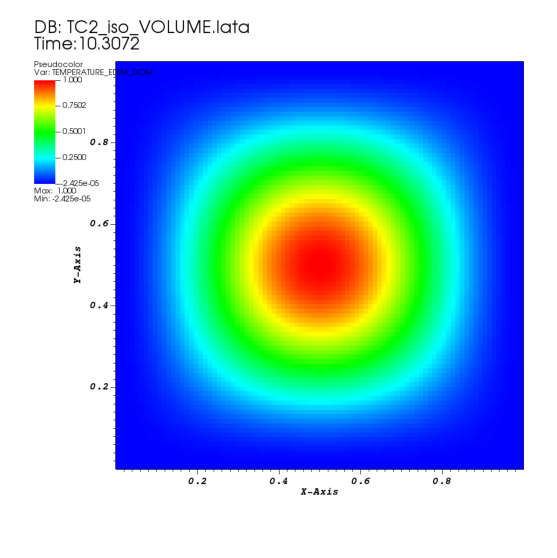

In [22]:
visit.showField("TC2/Ar1/M2/TC2_iso_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (Isotropic) : M2

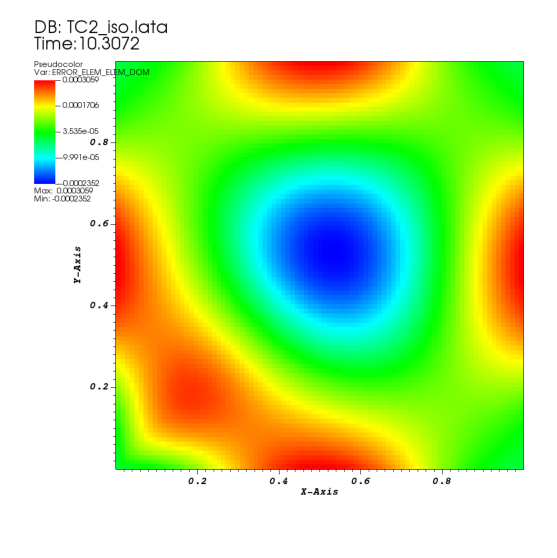

In [23]:
visit.showField("TC2/Ar1/M2/TC2_iso.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state (Isotropic conductivity) : M3

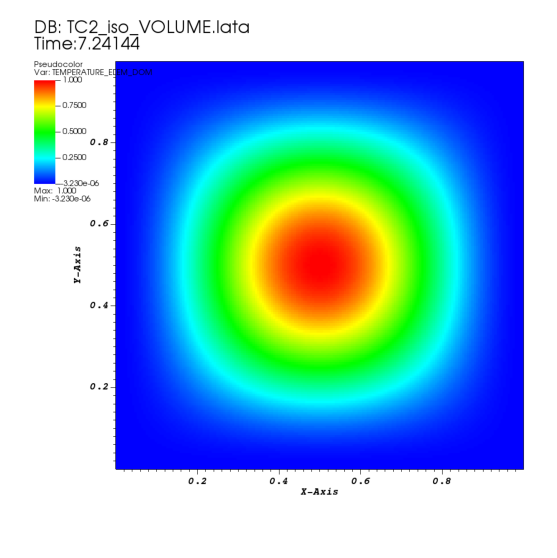

In [24]:
visit.showField("TC2/Ar1/M3/TC2_iso_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (Isotropic) : M3

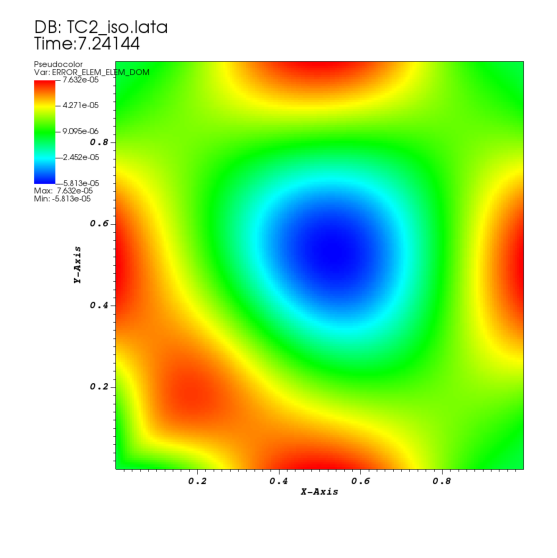

In [25]:
visit.showField("TC2/Ar1/M3/TC2_iso.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

## Results of test case 2 with $Ar= 10$

Figures 5.1-5.2 depict the distribution of the conductivity diagonal components. We note for mesh M1 that the time required to achieve a steady state is a bit long (physical time of 17 s). This is surely the effect of the increase in the anisotropic ratio. The obtained temperature distribution is shown in figure 5.3 and the difference from the analytical solution is considered in figure 5.4. Again, the difference between the numerical solution and the exact solution takes a maximum value of about $1.10^{−3}$ K near theboundary $\partial \Omega$. The numerical resolution improves and the  time required to attain a steady state reduces by refining the mesh. See figures 5.5 and 5.6 for M2, figures 5.7 and 5.8 for M3.

### Conductivity tensor : component 1

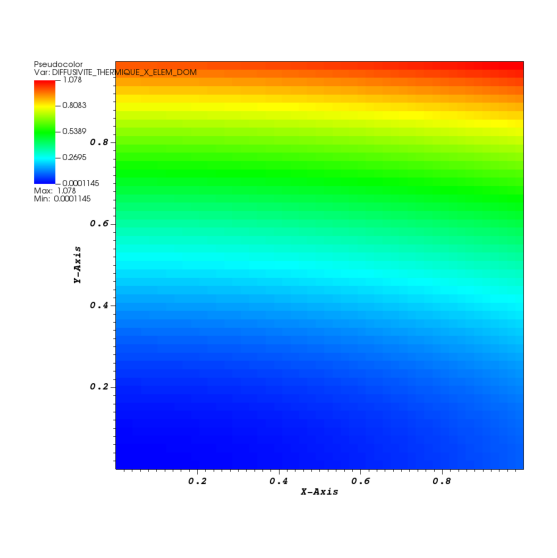

In [26]:
a = visit.Show("TC2/Ar10/M1/TC2_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_X_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Conductivity tensor : component 2

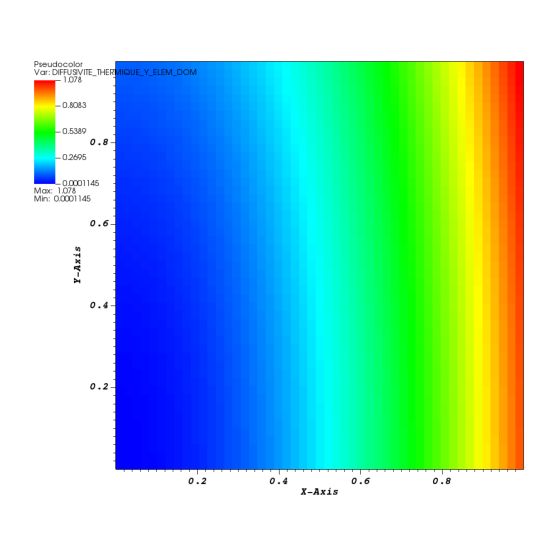

In [27]:
a = visit.Show("TC2/Ar10/M1/TC2_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_Y_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Temperature at steady state : M1

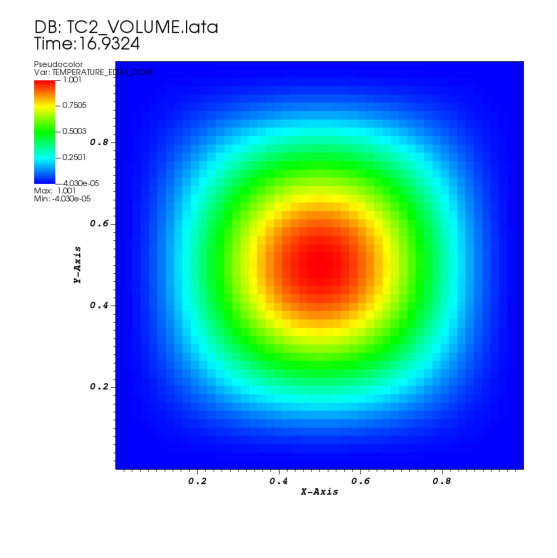

In [28]:
visit.showField("TC2/Ar10/M1/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (absolute value) : M1

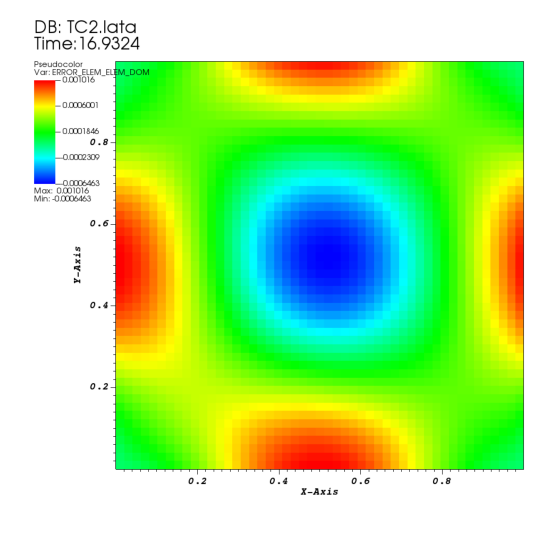

In [29]:
visit.showField("TC2/Ar10/M1/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state : M2

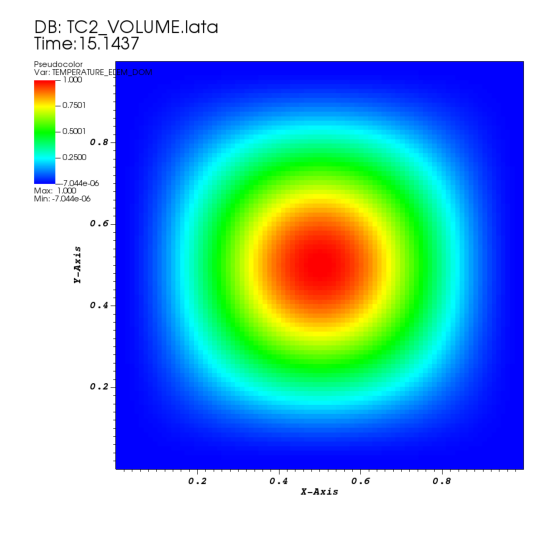

In [30]:
visit.showField("TC2/Ar10/M2/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution: M2

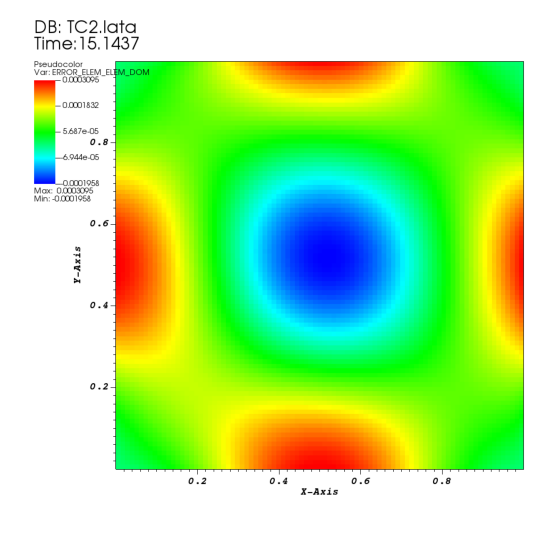

In [31]:
visit.showField("TC2/Ar10/M2/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state : M3

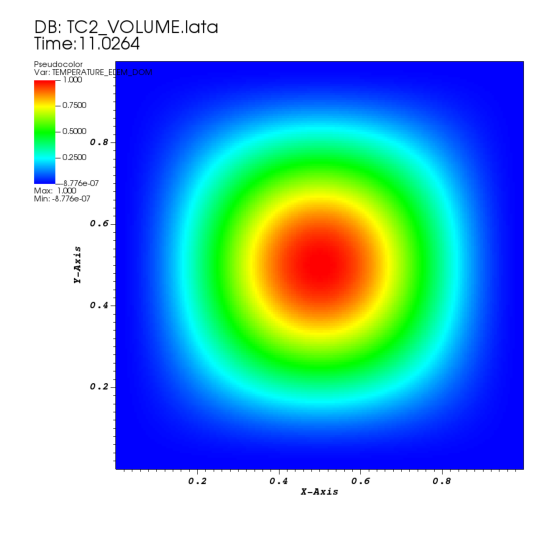

In [32]:
visit.showField("TC2/Ar10/M3/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution: M3

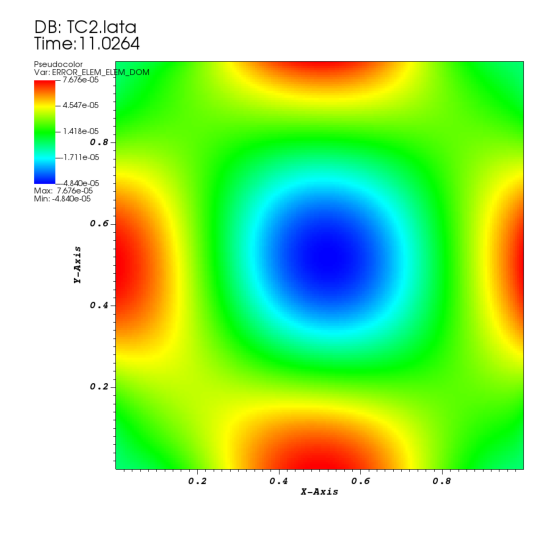

In [33]:
visit.showField("TC2/Ar10/M3/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

## Results of test case 2 with $Ar= 100$

Figures 6.1-6.2 show the distribution of the $\kappa$ components when the anisotropy ratio is set to 100. With mesh M1, the obtained temperature distribution (at steady state) is shown in figure 6.3 and the difference from the  analytical solution in figure 6.4. As expected, the resolution is improved by refining the mesh (figures 6.5 to 6.8). No issues of convergence are noticed here, unlike the VEF case (see the validation file of VEF)! This is a good result!

### Conductivity tensor : component 1

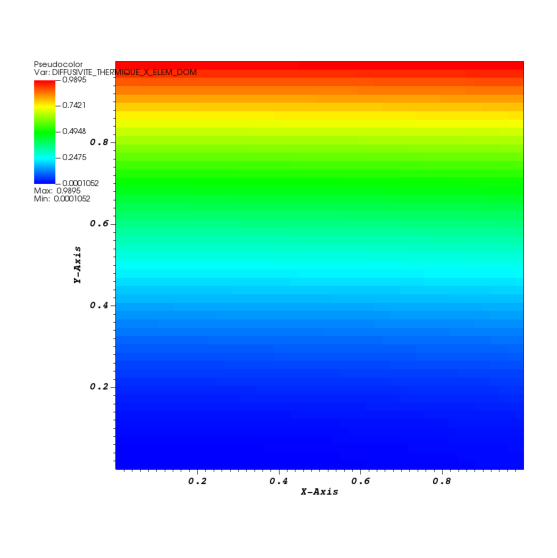

In [34]:
a = visit.Show("TC2/Ar100/M1/TC2_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_X_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Conductivity tensor : component 2

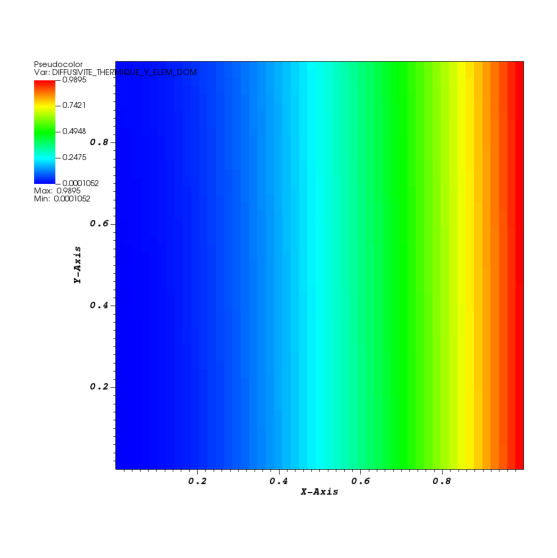

In [35]:
a = visit.Show("TC2/Ar100/M1/TC2_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_Y_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Temperature at steady state : M1

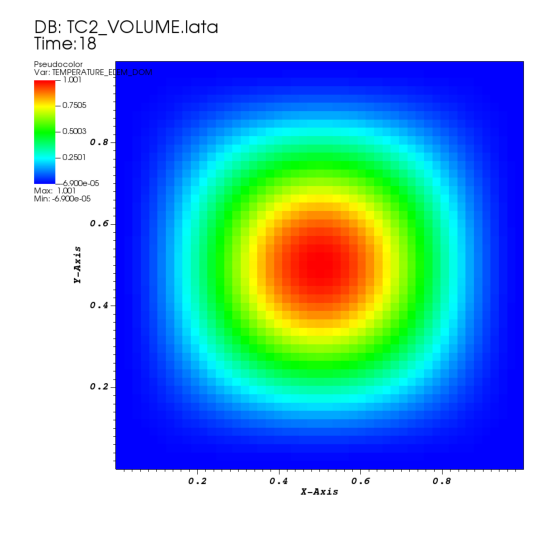

In [36]:
visit.showField("TC2/Ar100/M1/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (absolute value) : M1

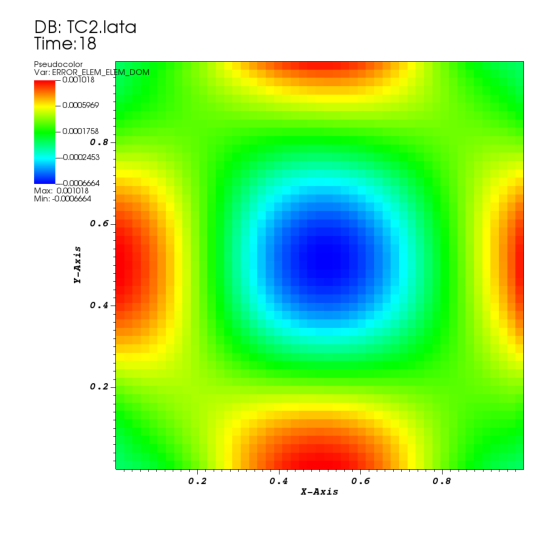

In [37]:
visit.showField("TC2/Ar100/M1/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state : M2

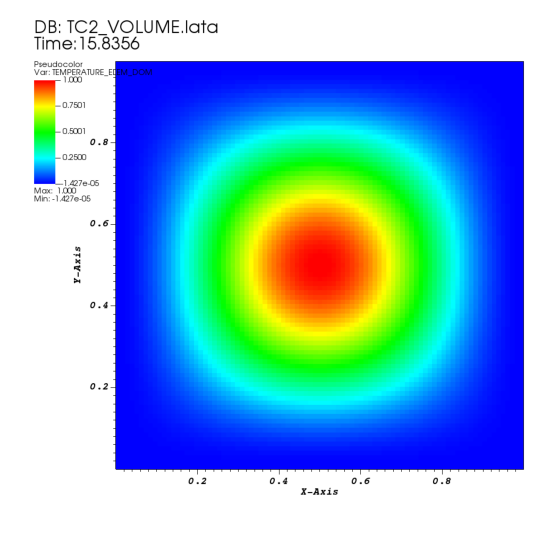

In [38]:
visit.showField("TC2/Ar100/M2/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (absolute value) : M2

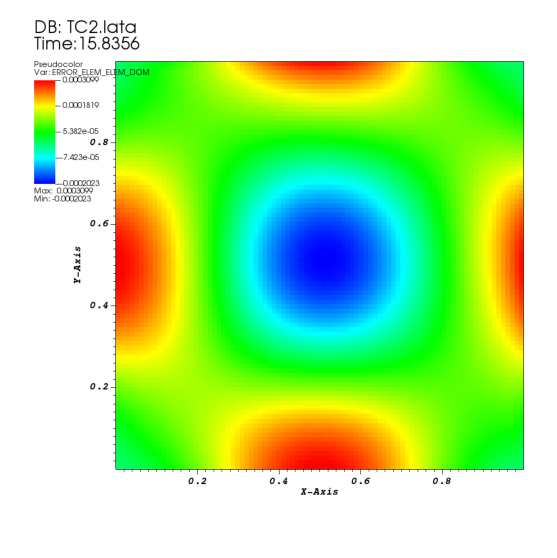

In [39]:
visit.showField("TC2/Ar100/M2/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state : M3

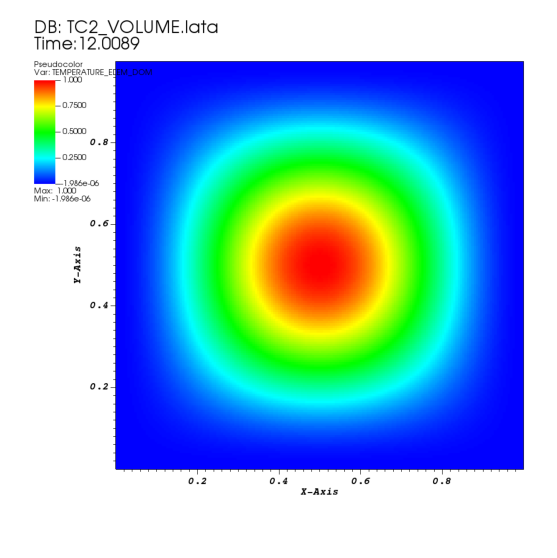

In [40]:
visit.showField("TC2/Ar100/M3/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (absolute value) : M3

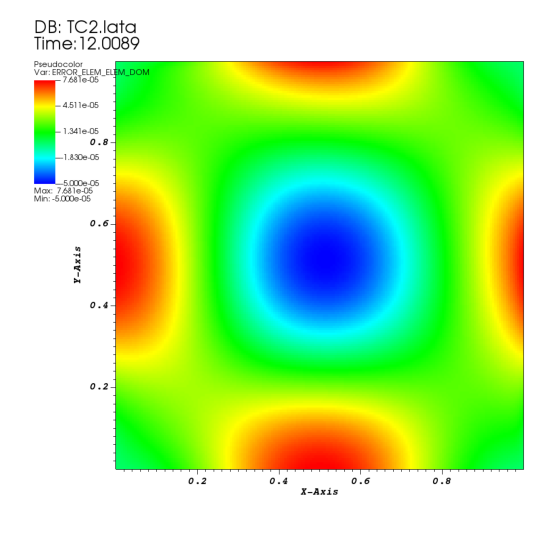

In [41]:
visit.showField("TC2/Ar100/M3/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

## Test case 2 : $Ar= 1000$

Same when the anisotropic ratio is increased to $Ar = 1000$. The resolution is improved by refining the
mesh and no convergence issues are reported.

### Conductivity tensor : component 1

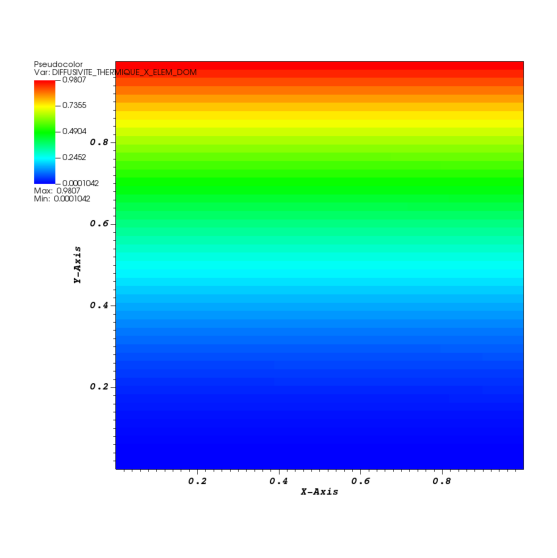

In [42]:
a = visit.Show("TC2/Ar1000/M1/TC2_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_X_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Conductivity tensor : component 2

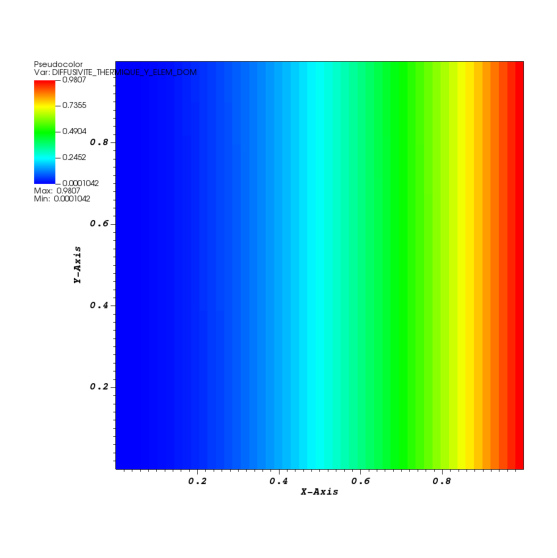

In [43]:
a = visit.Show("TC2/Ar1000/M1/TC2_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_Y_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Temperature at steady state : M1

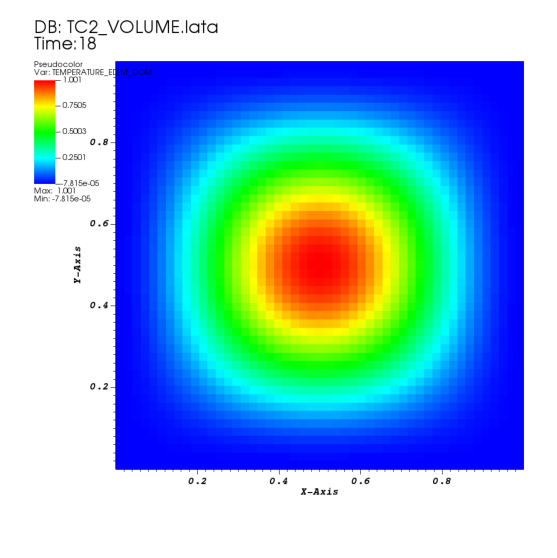

In [44]:
visit.showField("TC2/Ar1000/M1/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (absolute value) : M1

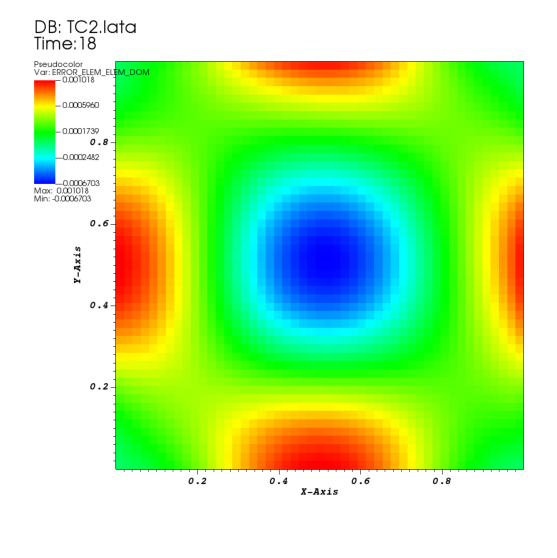

In [45]:
visit.showField("TC2/Ar1000/M1/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state : M2

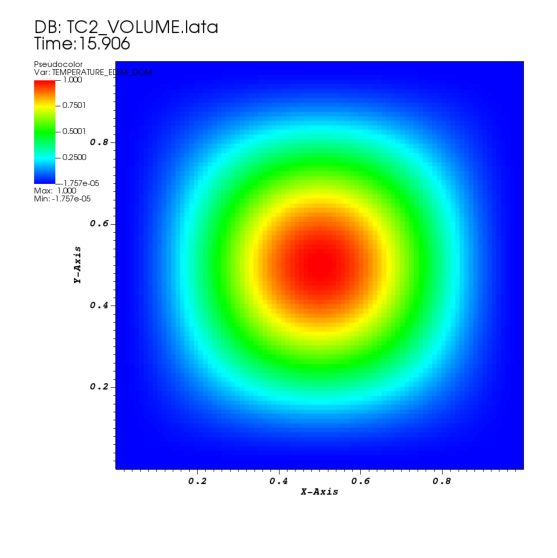

In [46]:
visit.showField("TC2/Ar1000/M2/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (absolute value) : M2

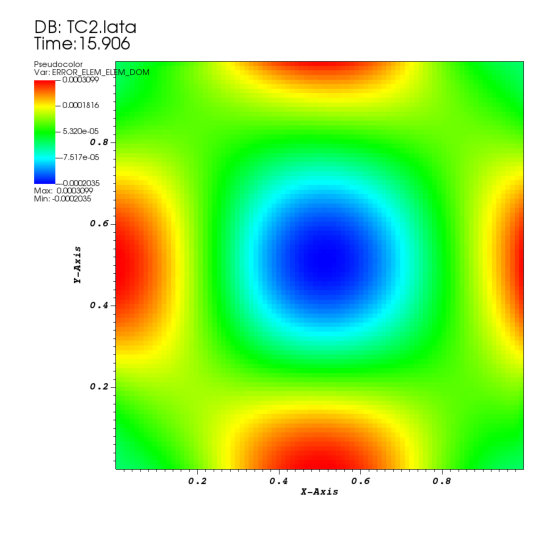

In [47]:
visit.showField("TC2/Ar1000/M2/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state : M3

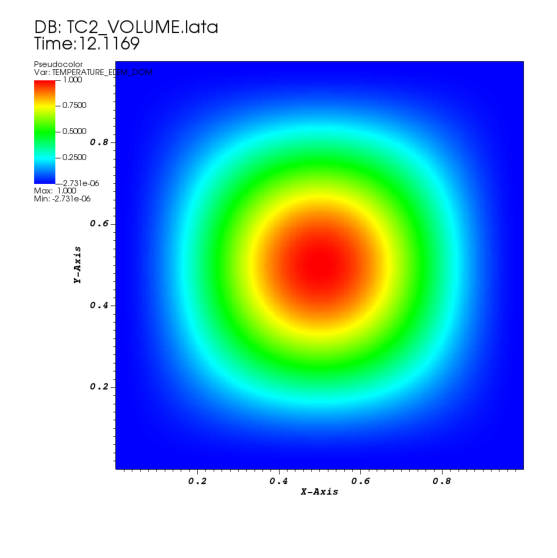

In [48]:
visit.showField("TC2/Ar1000/M3/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (absolute value) : M3

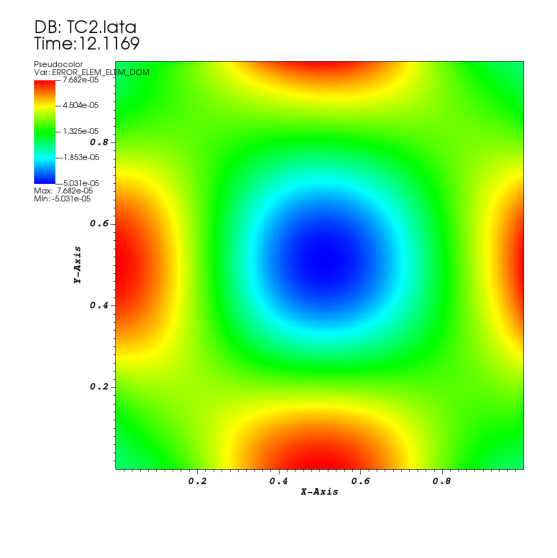

In [49]:
visit.showField("TC2/Ar1000/M3/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

## Max and average error

The table below summarizes the maximum and average error values we obtained in all cases at the steady state. The influence of the mesh refinement (for test case 2) is evident.

In [50]:
from trustutils import plot

Cas1 = plot.loadText("./TC1/Error_values.txt", dtype=str)
Cas2_Ar1_M1 = plot.loadText("./TC2/Ar1/M1/Error_values.txt", dtype=str)
Cas2_Ar10_M1 = plot.loadText("./TC2/Ar10/M1/Error_values.txt", dtype=str)
Cas2_Ar100_M1 = plot.loadText("./TC2/Ar100/M1/Error_values.txt", dtype=str)
Cas2_Ar1000_M1 = plot.loadText("./TC2/Ar1000/M1/Error_values.txt", dtype=str)
Cas2_Ar1_M2 = plot.loadText("./TC2/Ar1/M2/Error_values.txt", dtype=str)
Cas2_Ar10_M2 = plot.loadText("./TC2/Ar10/M2/Error_values.txt", dtype=str)
Cas2_Ar100_M2 = plot.loadText("./TC2/Ar100/M2/Error_values.txt", dtype=str)
Cas2_Ar1000_M2 = plot.loadText("./TC2/Ar1000/M2/Error_values.txt", dtype=str)
Cas2_Ar1_M3 = plot.loadText("./TC2/Ar1/M3/Error_values.txt", dtype=str)
Cas2_Ar10_M3 = plot.loadText("./TC2/Ar10/M3/Error_values.txt", dtype=str)
Cas2_Ar100_M3 = plot.loadText("./TC2/Ar100/M3/Error_values.txt", dtype=str)
Cas2_Ar1000_M3 = plot.loadText("./TC2/Ar1000/M3/Error_values.txt", dtype=str)

a = plot.Table(["Max value", "Average Value"])
a.addLigne([Cas1[0:2]],"Test Case 1")
a.addLigne([Cas2_Ar1_M1[0:2]],'Test Case 2, Ar=1 : M1')
a.addLigne([Cas2_Ar10_M1[0:2]],'Test Case 2, Ar=10 : M1')
a.addLigne([Cas2_Ar100_M1[0:2]],'Test Case 2, Ar=100 : M1')
a.addLigne([Cas2_Ar1000_M1[0:2]],'Test Case 2, Ar=1000 : M1')
a.addLigne([Cas2_Ar1_M2[0:2]],'Test Case 2, Ar=1 : M2')
a.addLigne([Cas2_Ar10_M2[0:2]],'Test Case 2, Ar=10 : M2')
a.addLigne([Cas2_Ar100_M2[0:2]],'Test Case 2, Ar=100 : M2')
a.addLigne([Cas2_Ar1000_M2[0:2]],'Test Case 2, Ar=1000 : M2')
a.addLigne([Cas2_Ar1_M3[0:2]],'Test Case 2, Ar=1 : M3')
a.addLigne([Cas2_Ar10_M3[0:2]],'Test Case 2, Ar=10 : M3')
a.addLigne([Cas2_Ar100_M3[0:2]],'Test Case 2, Ar=100 : M3')
a.addLigne([Cas2_Ar1000_M3[0:2]],'Test Case 2, Ar=1000 : M3')

a.df

,Max value,Average Value
Test Case 1,1.807e-10,5.392e-11
"Test Case 2, Ar=1 : M1",0.0009935,0.0002831
"Test Case 2, Ar=10 : M1",0.001016,0.0002849
"Test Case 2, Ar=100 : M1",0.001018,0.0002755
"Test Case 2, Ar=1000 : M1",0.001018,0.0002741
"Test Case 2, Ar=1 : M2",0.0003059,8.581e-05
"Test Case 2, Ar=10 : M2",0.0003095,8.634e-05
"Test Case 2, Ar=100 : M2",0.0003099,8.348e-05
"Test Case 2, Ar=1000 : M2",0.0003099,8.304e-05
"Test Case 2, Ar=1 : M3",7.632e-05,2.121e-05


## Concluding remarks

In this report, a validation study concerning the implementation of a VDF anisotropic diffusion operator
for in the TRUST platform is documented. Different simulations are performed and numerical results at
steady-state are compared to analytical solutions for validations. Two test cases are investigated, either
with an anisotropic discontinuous conductivity tensor or a non-uniform one. The mesh sensitivity is
highlighted where numerical results show that TRUST can handle high anisotropic ratios if a fine mesh is
used. We advise the user to perform a grid convergence study before starting the physical interpretation
of the numerical data. Till present, we have only one limitation for the VDF anisotropic operator: **the
conductivity tensor should be diagonal**.

## Computer performance

In [51]:
from trustutils import run

run.tablePerf()

,host,system,Total CPU Time,CPU time/step,number of cells
TC1/TC1,is244522,Linux,0.279693,0.0104756,2500
TC2/Ar1/M1/TC2,is244522,Linux,0.365665,0.0225841,2401
TC2/Ar1/M2/TC2,is244522,Linux,1.434170,0.0593883,7921-7921
TC2/Ar1/M3/TC2,is244522,Linux,6.362870,0.133154,32041-32041
TC2/Ar1/M1/TC2_iso,is244522,Linux,0.287755,0.0176065,2401
TC2/Ar1/M2/TC2_iso,is244522,Linux,1.200410,0.0499948,7921-7921
TC2/Ar1/M3/TC2_iso,is244522,Linux,6.041380,0.127003,32041-32041
TC2/Ar10/M1/TC2,is244522,Linux,0.440714,0.0242887,2401
TC2/Ar10/M2/TC2,is244522,Linux,1.084560,0.0470174,7921-7921
TC2/Ar10/M3/TC2,is244522,Linux,5.141010,0.123407,32041-32041
